# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow and other libraries

In [1]:
import tensorflow as tf
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

## Importing the dataset

In [2]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Printing the shape

In [3]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)


(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


##Splitting the dataset 

In [4]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)


##Printing the shape

In [5]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)


(2000, 28, 28)
(8000, 28, 28)
(2000,)
(8000,)


##Resizing the images, normalizing the pixel values and One-Hot Encoding of the target variables

In [6]:
# Reshaping 
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

print(X_test.shape)
print(X_train.shape)

# Normalizing
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')
X_train= X_train/255.0
X_test= X_test/255.0

print(Y_train.shape)
print(Y_test.shape)

# One-Hot Encoding
Y_train= to_categorical(Y_train)
Y_test= to_categorical(Y_test)

print(Y_train.shape)
print(Y_test.shape)

(2000, 28, 28, 1)
(8000, 28, 28, 1)
(8000,)
(2000,)
(8000, 10)
(2000, 10)


## Visualizing the dataset
Printing the images with their labels.

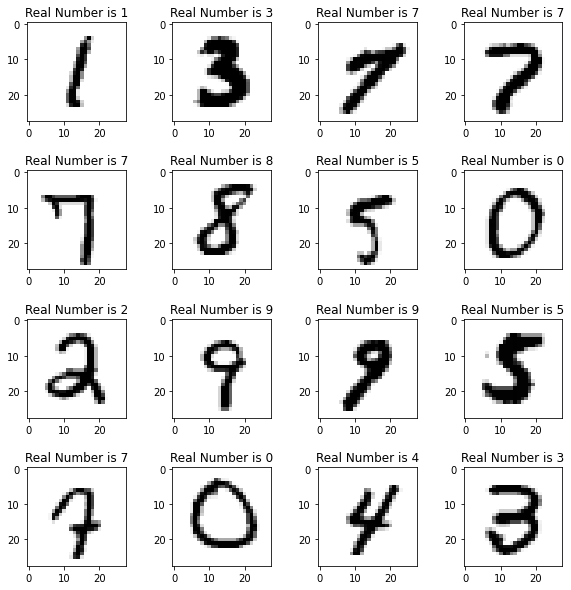

In [7]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

# 4 rows and 4 columns 
fig, axis = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axis.flat):
    # Plotting raw pixel data
    ax.imshow(X_train__[i], cmap='binary')
    # Labels
    digit = Y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");
# adjusting the spacing
plt.subplots_adjust(wspace=0.2, hspace=0.5) 

###Plotting statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

[203, 208, 211, 213, 188, 201, 169, 201, 198, 208]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Text(0.5, 0, 'Digits')

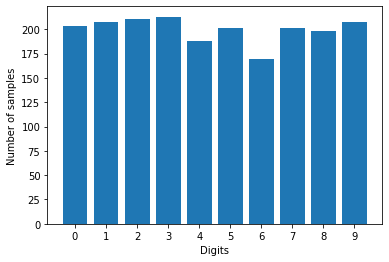

In [8]:
import numpy as np

# For testing dataset
digits=['0','1','2','3','4','5','6','7','8','9']
n_samples=[]
zero=one=two=three=four=five=six=seven=eight=nine=0
for i in Y_test:
  if i.argmax()==0:
    zero+=1
  elif i.argmax()==1:
    one+=1
  elif i.argmax()==2:
    two+=1
  elif i.argmax()==3:
    three+=1
  elif i.argmax()==4:
    four+=1
  elif i.argmax()==5:
    five+=1
  elif i.argmax()==6:
    six+=1
  elif i.argmax()==7:
    seven+=1
  elif i.argmax()==8:
    eight+=1
  elif i.argmax()==9:
    nine+=1
  
n_samples.append(zero)
n_samples.append(one)
n_samples.append(two)
n_samples.append(three)
n_samples.append(four)
n_samples.append(five)
n_samples.append(six)
n_samples.append(seven)
n_samples.append(eight)
n_samples.append(nine)

print(n_samples)
print(digits)
plt.bar(digits,n_samples)
plt.ylabel("Number of samples")
plt.xlabel("Digits")

[777, 927, 821, 797, 794, 691, 789, 827, 776, 801]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Text(0.5, 0, 'Digits')

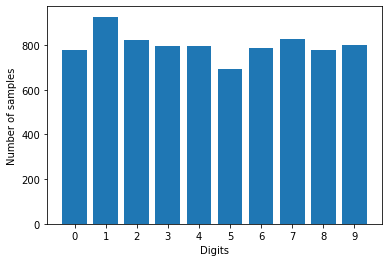

In [9]:
# For training data
n_samples=[]
zero=one=two=three=four=five=six=seven=eight=nine=0
for i in Y_train:
  if i.argmax()==0:
    zero+=1
  elif i.argmax()==1:
    one+=1
  elif i.argmax()==2:
    two+=1
  elif i.argmax()==3:
    three+=1
  elif i.argmax()==4:
    four+=1
  elif i.argmax()==5:
    five+=1
  elif i.argmax()==6:
    six+=1
  elif i.argmax()==7:
    seven+=1
  elif i.argmax()==8:
    eight+=1
  elif i.argmax()==9:
    nine+=1
  
n_samples.append(zero)
n_samples.append(one)
n_samples.append(two)
n_samples.append(three)
n_samples.append(four)
n_samples.append(five)
n_samples.append(six)
n_samples.append(seven)
n_samples.append(eight)
n_samples.append(nine)

print(n_samples)
print(digits)
plt.bar(digits,n_samples)
plt.ylabel("Number of samples")
plt.xlabel("Digits")

#CNN
###Defining the Model

In [10]:
# Model building
model=Sequential()


# We use a 3 x 3 convolution filter
# The number of output filters in the convolution is 64
# Convolutional layer with rectified linear unit activation
# img_rows=28 img_cols=28 and 1 for grayscale images
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1))) 
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
# Pooling is used to reduce the image size of width and height and it does is it pick the maximum value in a certain size of the window.
# Max pooling with a 2 x 2 window 
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
# Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
# Implements regularisation
model.add(BatchNormalization())

# We use a 3 x 3 convolution filter
# The number of output filters in the convolution is 128
# Convolutional layer with rectified linear unit activation
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# Pooling is used to reduce the image size of width and height and it does is it pick the maximum value in a certain size of the window.
# Max pooling with a 2 x 2 window
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
# Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
# Implements regularisation
model.add(BatchNormalization())    

# We use a 3 x 3 convolution filter
# The number of output filters in the convolution is 256
# Convolutional layer with rectified linear unit activation
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# Pooling is used to reduce the image size of width and height and it does is it pick the maximum value in a certain size of the window.
# Max pooling with a 2 x 2 window
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
# Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
# Implements regularisation
model.add(BatchNormalization())

# Flatten since too many dimensions, we only want a classification output 
model.add(Flatten())
# Adding the Dense layer with 512 units
model.add(Dense(512,activation="relu"))
# Softmax to squash the matrix into output probabilities
model.add(Dense(10,activation="softmax"))

##Compiling and training the model

In [13]:
# Compiling the model
# Using adam optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

num_epoch = 10
# Model training
history = model.fit(X_train, Y_train,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))

#Printing loss and accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

Epoch 1/10
250/250 [==============================] - 6s 20ms/step - loss: 0.4184 - accuracy: 0.9794 - val_loss: 2.0862 - val_accuracy: 0.9655
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.7292 - accuracy: 0.9783 - val_loss: 2.3143 - val_accuracy: 0.9560
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 0.5109 - accuracy: 0.9837 - val_loss: 0.8341 - val_accuracy: 0.9775
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2521 - accuracy: 0.9905 - val_loss: 1.0141 - val_accuracy: 0.9710
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0879 - accuracy: 0.9948 - val_loss: 0.4874 - val_accuracy: 0.9845
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1018 - accuracy: 0.9942 - val_loss: 1.1091 - val_accuracy: 0.9665
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1998 - accuracy: 0.9916 - val_loss: 1.1618 - val_accuracy: 0.9710

## Predicting the images
Printing the image along with its label (true value) and predicted value.

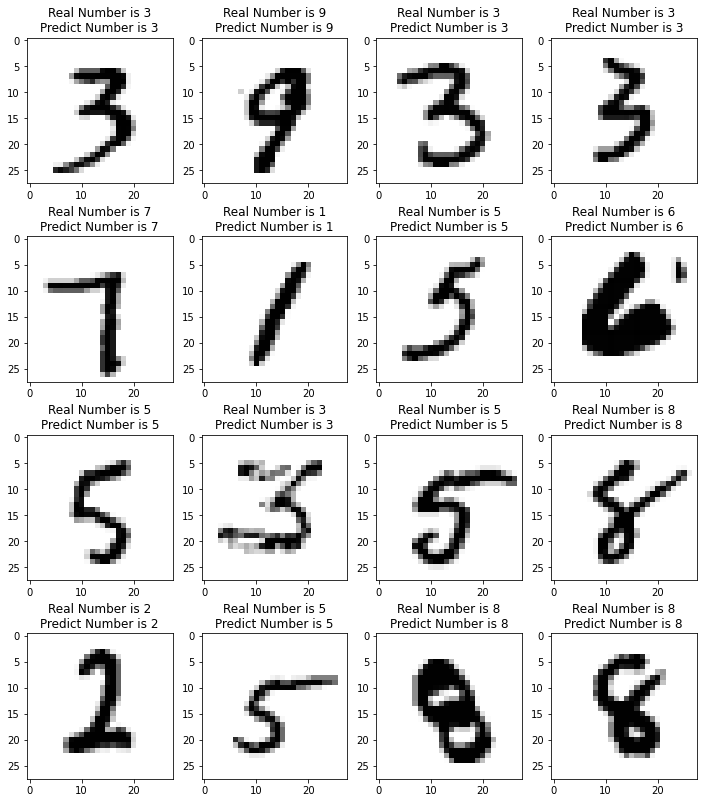

In [12]:
# Your code
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)
y_pred = model.predict(X_test__) # Prediction the model

fig, axis = plt.subplots(4, 4, figsize=(12, 14)) # plt.subplots returns a tuple containing a figure and axes objects
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");
